# Attributes

People:

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products:

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion:

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place:

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [46]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning libraries
# Models
from sklearn.cluster import KMeans, AgglomerativeClustering

# Pre-processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
# Evaluate
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report

In [48]:
customers = pd.read_csv(r'C:\Users\Murillo\Desktop\Python\Portfolio\Marketing/marketing_campaign.csv', sep='\t')
customers.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
customers.shape

(2240, 29)

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
customers.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [6]:
customers.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
customers.duplicated().sum()

0

In [49]:
customers['Income'].fillna(customers['Income'].median(), inplace = True)

In [50]:
customers['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [10]:
customers['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [51]:
# Taking 2021 as the year of the datas as extract
customers['Age'] = 2021 - customers['Year_Birth']

# Number of children
customers['Children'] = customers['Kidhome'] + customers['Teenhome']

# Renaming columns
customers = customers.rename(columns={'MntWines':'Wines', 'MntFruits':'Fruits', 'MntMeatProducts':'Meat', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweet',
                                      'MntGoldProds':'Gold', 'NumDealsPurchases':'Deals', 'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog',
                                      'NumStorePurchases':'Store', 'NumWebVisitsMonth':'WebVisits'})

# Changing some marital status
customers['Marital_Status'] = customers['Marital_Status'].rename({'Alone':'Single', 'Absurd':'Single', 'YOLO':'Single'})

In [52]:
customers.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

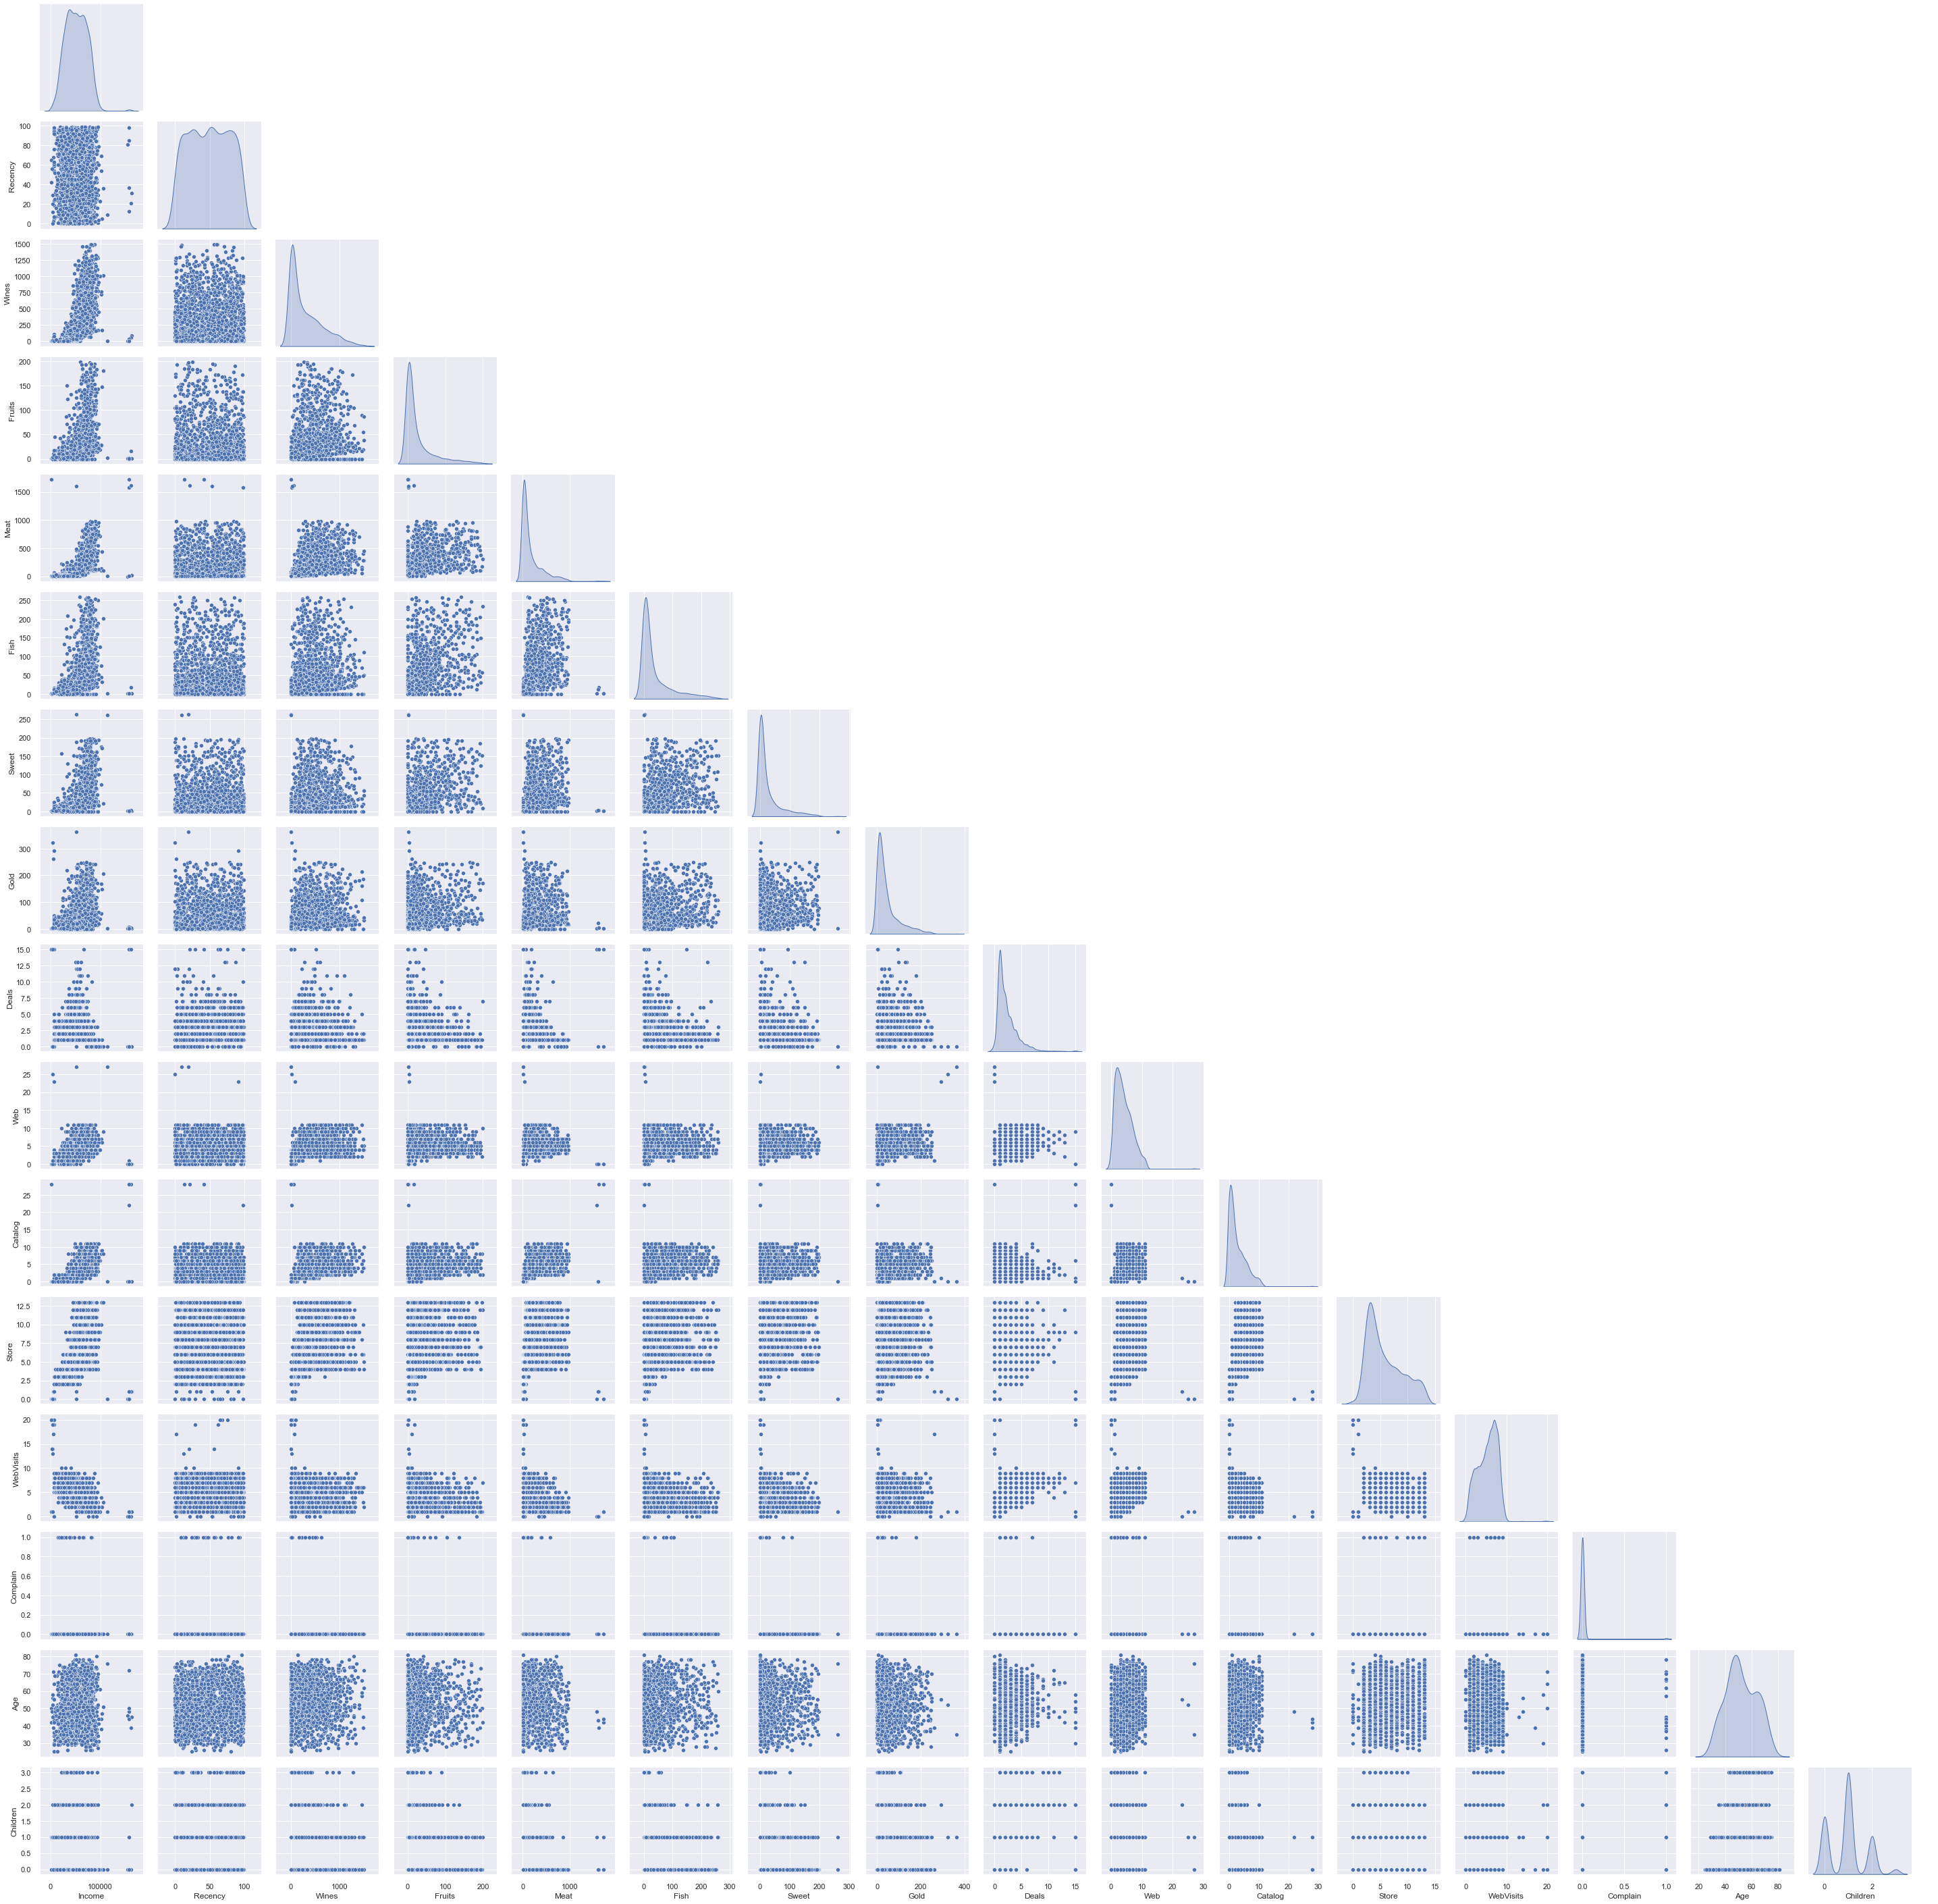

In [77]:
sns.set_theme(color_codes=True)

fig = sns.PairGrid(customers, diag_sharey=False, corner=True)
fig.map_lower(sns.scatterplot)
fig.map_diag(sns.kdeplot, fill=True)
fig.add_legend();

In [53]:
# Dropping outliers
customers.drop(customers[customers.Income > 200000].index, inplace=True)
customers.drop(customers[customers.Age > 90].index, inplace=True)

In [15]:
customers

Education Marital_Status   Income  Recency  Wines  Fruits  Meat  Fish  \
0     Graduation         Single  58138.0       58    635      88   546   172   
1     Graduation         Single  46344.0       38     11       1     6     2   
2     Graduation       Together  71613.0       26    426      49   127   111   
3     Graduation       Together  26646.0       26     11       4    20    10   
4            PhD        Married  58293.0       94    173      43   118    46   
...          ...            ...      ...      ...    ...     ...   ...   ...   
2235  Graduation        Married  61223.0       46    709      43   182    42   
2236         PhD       Together  64014.0       56    406       0    30     0   
2237  Graduation       Divorced  56981.0       91    908      48   217    32   
2238      Master       Together  69245.0        8    428      30   214    80   
2239         PhD        Married  52869.0       40     84       3    61     2   

      Sweet  Gold  Deals  Web  Catalog  Store  WebVisits  Complain  Age  \
0        88    88      3    8       10      4          7         0   64   
1         1     6      2    1        1      2          5         0   67   
2        21    42      1    8        2     10          4         0   56   
3         3     5      2    2        0      4          6         0   37   
4        27    15      5    5        3      6          5         0   40   
...     ...   ...    ...  ...      ...    ...        ...       ...  ...   
2235    118   247      2    9        3      4          5         0   54   
2236      0     8      7    8        2      5          7         0   75   
2237     12    24      1    2        3     13          6         0   40   
2238     30    61      2    6        5     10          3         0   65   
2239      1    21      3    3        1      4          7         0   67   

      Children  
0            0  
1            2  
2            0  
3            1  
4            1  
...        ...  
2235         1  
2236         3  
2237         0  
2238         1  
2239         2  

[2236 rows x 18 columns]

In [54]:
# Categoricals columns
categoricals = ['Education', 'Marital_Status']

# Numericals columns
numericals = ['Income', 'Children', 'Age', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold',
                        'Deals', 'Web', 'Catalog', 'Store', 'WebVisits']

In [55]:
# Scaling the numerical values and encoding the categorical ones
prep = make_column_transformer((OneHotEncoder(), categoricals), (StandardScaler(), numericals), remainder='passthrough')

In [56]:
# Fitting and transforming the features
prep.fit(customers)
customers_scaled = prep.transform(customers)
customers_scaled

array([[ 0.        ,  0.        ,  1.        , ..., -0.55242921,
         0.69286459,  0.        ],
       [ 0.        ,  0.        ,  1.        , ..., -1.16773767,
        -0.13142124,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  1.29349615,
        -0.54356416,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  2.21645883,
         0.28072168,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.29349615,
        -0.95570708,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.55242921,
         0.69286459,  0.        ]])

In [57]:
# Reduction of dataframe with PCA
pca = PCA(n_components=3)
pca.fit(customers_scaled)
customers_reduc = pca.transform(customers_scaled)
customers_reduc

array([[ 3.87085847,  0.47302546,  0.92673516],
       [-2.2953599 , -0.17663221, -1.41816302],
       [ 1.99642004, -0.12738461,  0.02042007],
       ...,
       [ 1.3879828 , -0.62150226,  0.02536789],
       [ 1.90176789,  0.61794033, -0.94540069],
       [-1.89035354,  0.99054145, -1.1958885 ]])

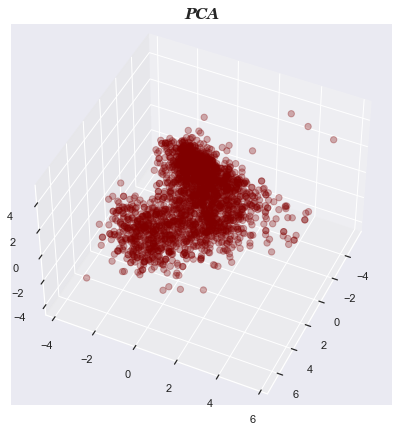

In [75]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection='3d')
ax.scatter3D(customers_reduc[:,0], customers_reduc[:,1], customers_reduc[:,2], alpha=0.3, s=40, c="maroon")
ax.view_init(45, 25)
plt.title('PCA', fontdict={'fontweight':'bold', 'fontsize':16, 'family':'Georgia', 'style':'italic'})
plt.show();

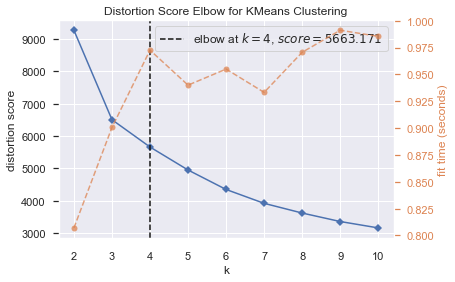

In [78]:
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(customers_reduc)
Elbow.show();

In [79]:
# Clustering
kmeans = KMeans(n_clusters=4)
df = pd.DataFrame(customers_reduc)
customers['Cluster'] = kmeans.fit_predict(df)

In [80]:
customers.head()

Education Marital_Status   Income  Recency  Wines  Fruits  Meat  Fish  \
0  Graduation         Single  58138.0       58    635      88   546   172   
1  Graduation         Single  46344.0       38     11       1     6     2   
2  Graduation       Together  71613.0       26    426      49   127   111   
3  Graduation       Together  26646.0       26     11       4    20    10   
4         PhD        Married  58293.0       94    173      43   118    46   

   Sweet  Gold  Deals  Web  Catalog  Store  WebVisits  Complain  Age  \
0     88    88      3    8       10      4          7         0   64   
1      1     6      2    1        1      2          5         0   67   
2     21    42      1    8        2     10          4         0   56   
3      3     5      2    2        0      4          6         0   37   
4     27    15      5    5        3      6          5         0   40   

   Children  Cluster  
0         0        3  
1         2        0  
2         0        1  
3         1        0  
4         1        2

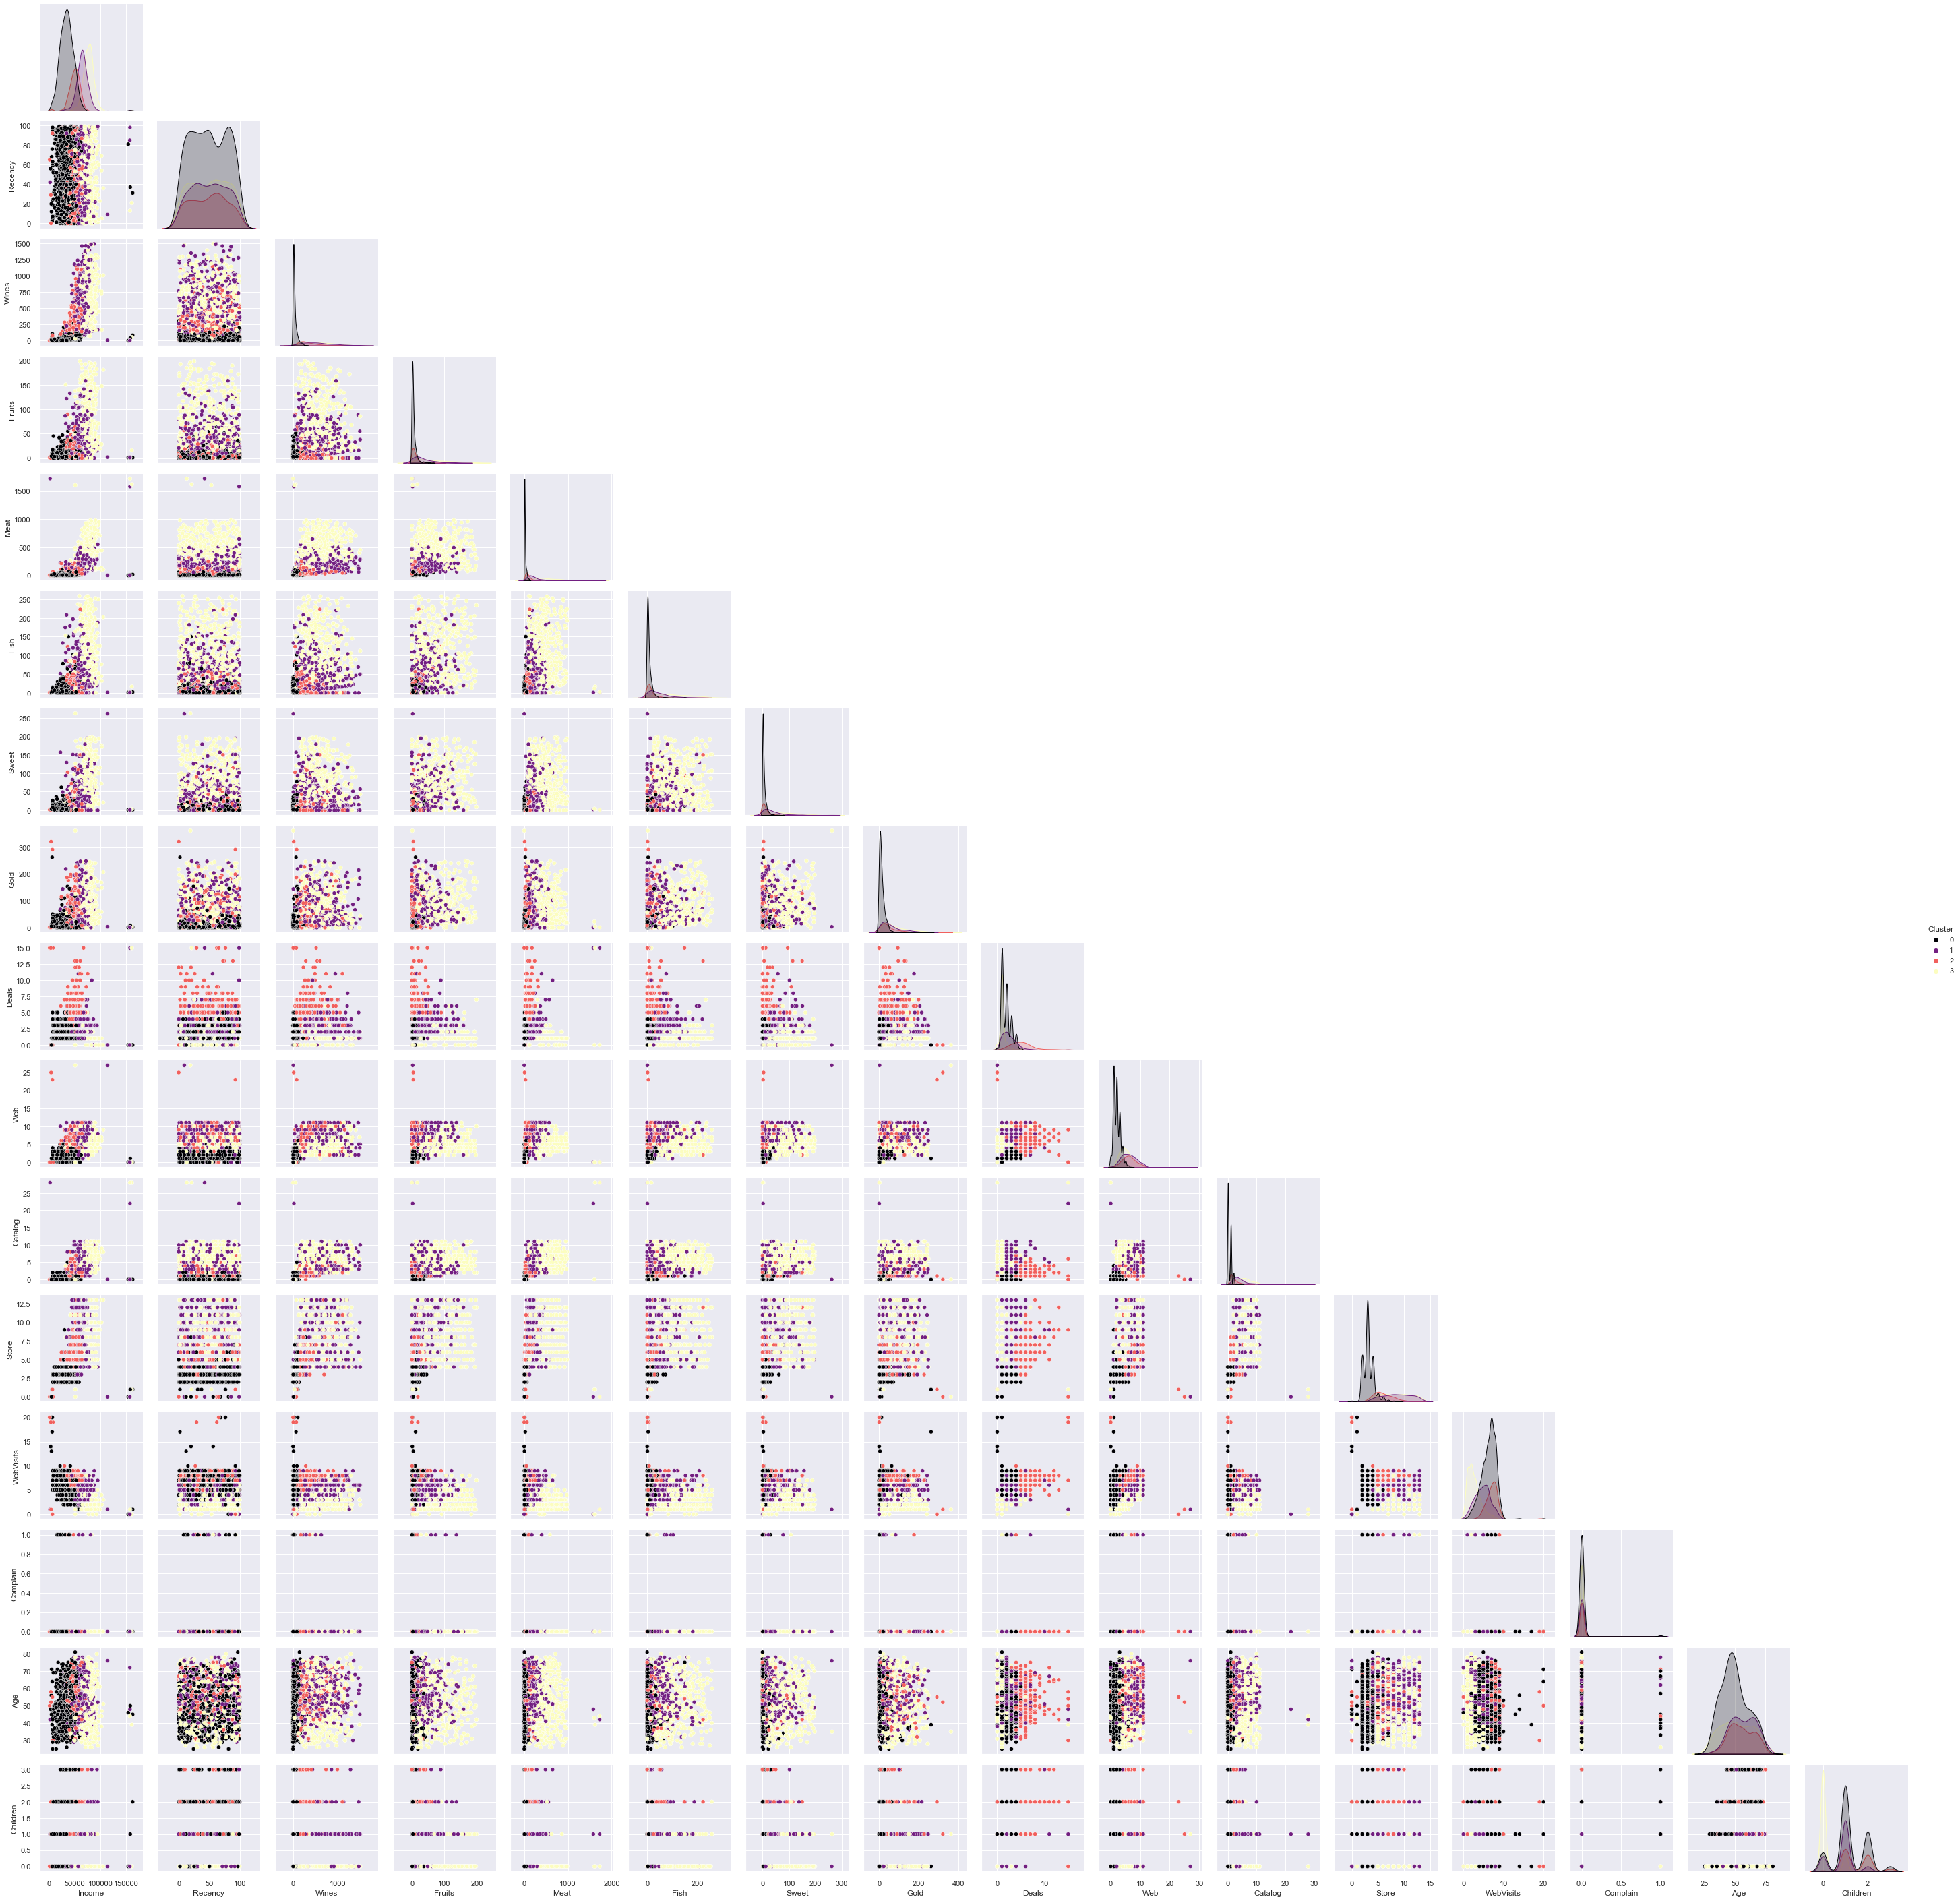

In [82]:
fig2 = sns.PairGrid(customers, hue='Cluster', palette='magma', diag_sharey=False, corner=True)
fig2.map_lower(sns.scatterplot)
fig2.map_diag(sns.kdeplot, fill=True)
fig2.add_legend();